# Decision Trees and Random Forest


## Exercise: Decision Trees

We are going to use the breast cancer dataset from sklearn where the goal is to classify each sample as malignant or benign (binary classification task) based on features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  


### Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline
np.random.seed(1)
plt.figure(figsize=(30,30))


<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

### Load the data

In [2]:
# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


### 1. Model fitting

In this exercise you need to do the following:
- Split the data into a training and a test set using test size of 30% of the training set.

- Train a decision tree classifier to the data and visualize it.

- Make a prediction for the test set

- Evaluate the model's performance by computing the accuracy score and plotting the confusion matrix. 

#### Hints: 
Decision Trees: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Tree Plot: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

Confusion matrix plot: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay


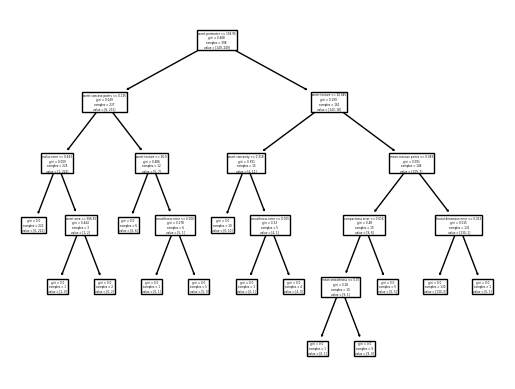

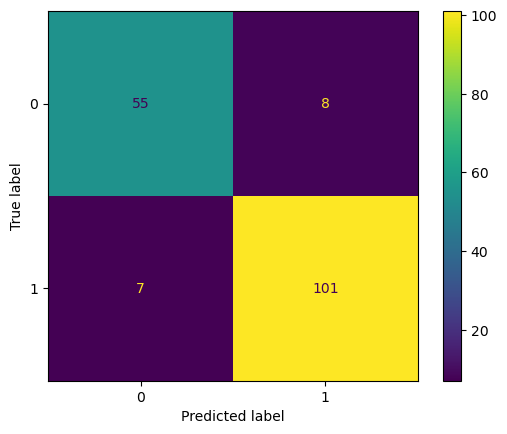

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

# Apply a decisiontree classifier to the data and visualize your decision tree
#### START YOUR SOLUTION HERE ####
# Split the data into training and test set
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)

# fit model 
clf = DecisionTreeClassifier(min_samples_leaf=1 , max_depth = None)
clf = clf.fit(trainX, trainy)

# Plot the fitted tree
plot_tree(clf,  feature_names=list(cancer.feature_names))
plt.show()

# compute predictions for test set
pred = clf.predict(testX)

# Compute the accuracy score
acc = clf.score(testX, testy)

# Compute the confusion matrix
cm = confusion_matrix(testy, pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()


#### END YOUR SOLUTION HERE ###

### Tuning tree depth with grid search CV
Tune the tree depth parameter using grid seacrh cross validation. Check out depth values between 1 and 10. 
- What is the optimal tree depth and its corresponding test accuracy score?

- Plot the tree with the optimal depth parameter.

- What is the CV accuracy for the best parameter (tree depth)?

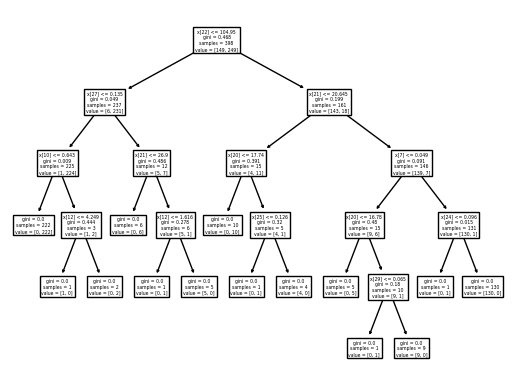

Hyperparameters (best max_depth): {'max_depth': 10}
Training CV Accuracy Score: 0.9448
Test Accuracy Score: 0.9532


In [10]:
# Grid Search - tuning tree depth
from sklearn.model_selection import GridSearchCV

#### START YOUR SOLUTION HERE ####
# Define grid for the parameter to test - max_depth from 1 to 10
grid = {
    'max_depth' : np.arange(1,11)
}
# Define and fit model using grid search CV with 5-fold cross validation
tree = DecisionTreeClassifier()
cvTree = GridSearchCV(tree, grid, cv=5)
cvTree.fit(trainX,trainy)

# Plot the fitted tree
plot_tree(cvTree.best_estimator_)
plt.show()

# Print results
print("Hyperparameters (best max_depth):", cvTree.best_params_)
print("Training CV Accuracy Score:", round(cvTree.best_score_, 4))
print("Test Accuracy Score:", round(cvTree.score(testX, testy), 4))
#### END YOUR SOLUTION HERE ####

## Exercise: Random Forest
Now we train a random forest model to the same dataset (for the same task) using the same training test split.
- Apply a random forest classifier with 100 trees to the data.
- Compute and print the training and test accuracies and compare it to the out of bag score (hint: set `oob_score = True` in classifier).

#### Hints:
Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

OOB: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html


Performance measurements 
 training accuracy      :  1.0 
 test accuracy       :  0.947 
 out of bag accuracy :  0.957 



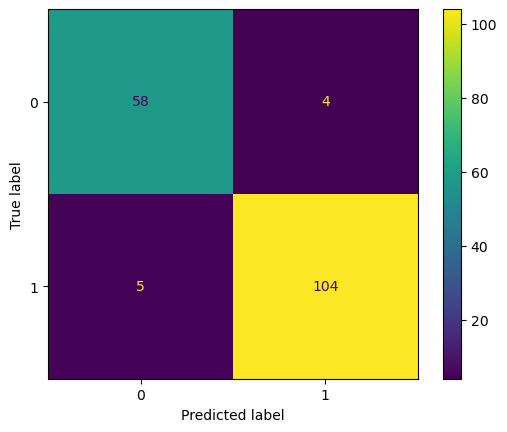

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

#### END YOUR SOLUTION HERE ####
# fit model 
rfc = RandomForestClassifier(oob_score= True)
rfc.fit(trainX,trainy)

# compute predictions for the training and test sets
pred_train = rfc.predict(trainX)
pred = rfc.predict(testX)

# compute the accuracy scores (test, training and OOB)
acc_test = accuracy_score(pred, testy)
acc_train = accuracy_score(pred_train, trainy)
acc_oob = rfc.oob_score_

# print the computed scores
print( "Performance measurements", "\n",
       "training accuracy      : ", round(acc_train,3),"\n",
       "test accuracy       : ", round(acc_test,3), "\n",
       "out of bag accuracy : ", round(acc_oob,3),"\n"
       )

# Compute the confusion matrix
cm = confusion_matrix(pred, testy)

# Plot the confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
#### END YOUR SOLUTION HERE ####





### Tune the number of trees parameter using grid search

Use grid search CV (5 folds) to find the best number of treees (estimators) using a grid from 100 to 1000 with a step of 100. Print the best number of trees and its corresponding test accuracy score and cross validation accuracy score.

In [22]:
#### START YOUR SOLUTION HERE ####
# Define the grid for the number of trees
grid = {
    'n_estimators' : np.arange(100,1000,100)
}
rfc = RandomForestClassifier(oob_score= True)
# Do a grid search to find the optimal number of trees
cvRfc = GridSearchCV(rfc, grid, cv=5)
cvRfc.fit(trainX,trainy)

# print the best hyperparameter
print(cvRfc.best_params_)

# print the training CV accuracy score
print("Training CV Accuracy Score:", cvRfc.best_score_)
# print the test accuracy score
print("Test Accuracy Score:", cvRfc.score(testX, testy))

#### END YOUR SOLUTION HERE ####

{'n_estimators': 300}
Training CV Accuracy Score: 0.9497784810126584
Test Accuracy Score: 0.9532163742690059


### Importance plot
Use the permutation importance to compute the feature importances for the best model from the grid search CV. 

#### Hints:
Forest importances: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


In [ ]:
# retrieve the relative importance of each variable and visualize the importance plot
from sklearn.inspection import permutation_importance

#### START YOUR SOLUTION HERE ####
# get the best model from the grid search CV
best_rf_model = rf_cv.best_estimator_
# compute the feature importances using permutation test

# sort them

# plot the importances

#### END YOUR SOLUTION HERE ####

Below we use the attribute `feature_importances_` of random forest model selected in the grid search that quantifies the feature importance based on mean decrease in impurity. These scores, however, can be misleading for continuous and high cardinality features. 

In [ ]:
# get the feature importances from the fitted model
importances = best_rf_model.feature_importances_
# get the standard deviations
std = np.std([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)
# put them in pandas series
forest_importances = pd.Series(importances, index=cancer.feature_names)
# sort them
forest_importances.sort_values(inplace=True, ascending=False)

# plot them
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
